In [16]:
import numpy as np
import pandas as pd
from bokeh.plotting import save, figure, show
import matplotlib.pyplot as plt

In [86]:
labels = pd.Series(['green', 'blue', 'green', 'blue'])
points = np.array([[1,1],[4,4],[1,1],[1,1]])

data = pd.DataFrame(points, columns=("x", "y"))
data["label"] = labels
unique_labels = np.unique(labels)
num_labels = unique_labels.shape[0]
hhist, hedges = np.histogram(points[:, 0], bins=4)
print(hedges)

[1.   1.75 2.5  3.25 4.  ]


0    1
2    1
Name: x, dtype: int32
1    2
3    1
Name: x, dtype: int32


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 2 BarContainer objects>)

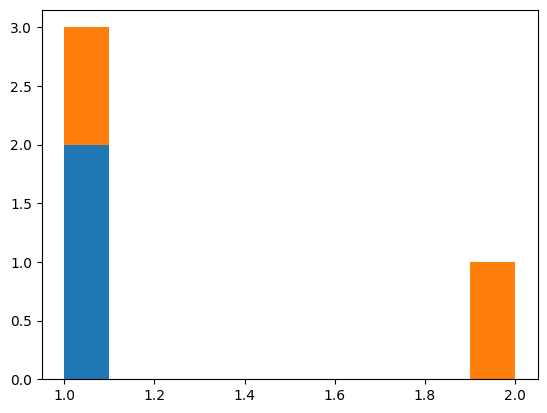

In [78]:
#plt.hist([data["g"]])
gre = data[data["label"] == "green"]["x"]
blu = data[data["label"] == "blue"]["x"]
print(gre)
print(blu)
np.histogram(gre, bins=hedges)
plt.hist([gre, blu], bins=hedges, stacked=True)

In [93]:
from bokeh.palettes import HighContrast3, HighContrast, Category20

bucket_ref = list(map(str, hedges))

plot_data = { 'hedges': bucket_ref }
for l in unique_labels:
    plot_data[l] = np.histogram(data[data["label"] == l]["x"], bins=hedges)[0]

print(plot_data)    
    
#               "green": [gre_hist[0][0], gre_hist[1][0]],
#               "blue": [blu_hist[0][0], blu_hist[1][0]],
#               }
# print(plot_data)
ph = figure(x_range=bucket_ref)
ph.vbar_stack(["green", "blue"], source=plot_data, x='hedges', color=HighContrast3[:2])
show(ph)

{'hedges': ['1.0', '1.75', '2.5', '3.25', '4.0'], 'blue': array([1, 0, 0, 1], dtype=int64), 'green': array([2, 0, 0, 0], dtype=int64)}


In [110]:
unique_labels = ["a", "b", "c"]
hedges = [-9.112878,  -7.1712003, -5.2295227, -3.287845,  -1.3461672,  0.5955105,  2.537188,   4.4788656,  6.4205437,  8.362221,  10.303899 ]
bucket_ref = list(map(str, hedges))[:-1]
plot_ref = {'hedges': bucket_ref}
plot_data = pd.DataFrame(np.random.randn(3, 3), columns=("x", "y", "slide"))
plot_data["slide"] = unique_labels
print(plot_data)
for l in unique_labels:
    plot_ref[str(l)] = np.histogram(plot_data[plot_data["slide"] == l]["x"], bins=hedges)[0]
print(plot_ref)
#ph = figure(x_range=bucket_ref)
ph = figure(x_range=bucket_ref)
print(list(map(str, unique_labels)))
ph.vbar_stack(list(map(str, unique_labels)), source=plot_ref, x='hedges')
show(ph)


          x         y slide
0  0.974407  1.348548     a
1 -0.380302  0.323523     b
2 -0.473860  1.358187     c
{'hedges': ['-9.112878', '-7.1712003', '-5.2295227', '-3.287845', '-1.3461672', '0.5955105', '2.537188', '4.4788656', '6.4205437', '8.362221'], 'a': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64), 'b': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64), 'c': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)}
['a', 'b', 'c']


[[ 0.51764541  0.68070501  1.09358682]
 [-0.12393542 -0.26226133  1.40147339]
 [-1.23309417 -0.39785245  1.80755962]
 [-0.22570127 -0.5150061  -0.45501417]
 [-0.26882336  0.41354937  2.54799831]
 [ 1.05410696  0.31189151  0.86711871]
 [-0.28658549 -0.14553382  0.80177693]
 [ 0.76363031  1.33939638 -0.12644264]
 [-0.40224441 -0.74185747 -0.72805732]
 [ 0.12092146 -0.59749541  1.10168186]]


(array([[ 1.,  0.,  5.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  3.,  8.,  1.,  3.,  2.,  2.,  0.,  0.,  0.],
        [ 1.,  4., 10.,  1.,  3.,  4.,  5.,  0.,  1.,  1.]]),
 array([-1.23309417, -0.85498492, -0.47687568, -0.09876643,  0.27934282,
         0.65745207,  1.03556132,  1.41367056,  1.79177981,  2.16988906,
         2.54799831]),
 <a list of 3 BarContainer objects>)

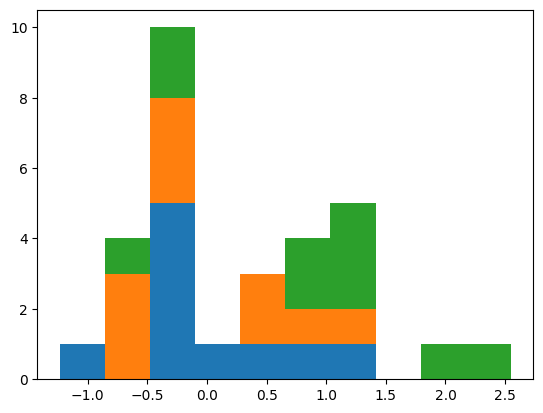

In [33]:
x = np.random.randn(10, 3)
print(x)
plt.hist(x, bins=10, stacked=True)